<a href="https://colab.research.google.com/github/Ronnie-Leon76/Machine-Learning-101/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

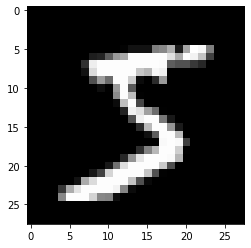

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.cm.gray, interpolation='nearest')

In [8]:
print(y_train[0])

5


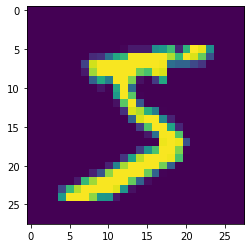

In [9]:
plt.imshow(X_train[0])

In [10]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [12]:
X_train, X_test = X_train/255.0, X_test/255.0

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

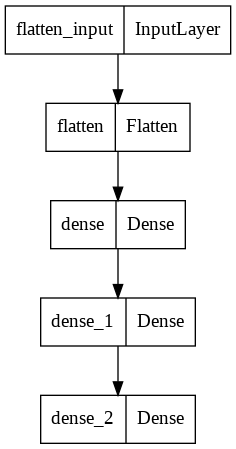

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

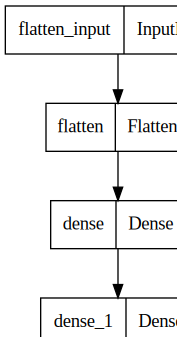

In [15]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
class accuracy99Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.999):
            print("\n\nWe reached 99.9% accuracy!\n")
            self.model.stop_training = True

In [22]:
%%time
# ~ 2 min
model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), callbacks=[accuracy99Callback()])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3286 - accuracy: 0.9025 - val_loss: 0.1985 - val_accuracy: 0.9423
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1597 - accuracy: 0.9525 - val_loss: 0.1437 - val_accuracy: 0.9553
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1246 - accuracy: 0.9625 - val_loss: 0.1366 - val_accuracy: 0.9603
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1055 - accuracy: 0.9688 - val_loss: 0.1190 - val_accuracy: 0.9642
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0923 - accuracy: 0.9720 - val_loss: 0.1104 - val_accuracy: 0.9662
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0826 - accuracy: 0.9744 - val_loss: 0.1251 - val_accuracy: 0.9632
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0750 - accuracy: 0.9766 - val_loss: 0.1237 - val_accuracy:

In [23]:
print(model.history.history)

{'loss': [0.3285760283470154, 0.15974299609661102, 0.12457966804504395, 0.10548319667577744, 0.09227658808231354, 0.08257845044136047, 0.07499884068965912, 0.06668727099895477, 0.06259454041719437, 0.05706063285470009, 0.052123285830020905, 0.04834911599755287, 0.04500651732087135, 0.042800936847925186, 0.040216121822595596, 0.03713555261492729, 0.03604951128363609, 0.031649500131607056, 0.032577477395534515, 0.029519665986299515, 0.028946956619620323, 0.02727825939655304, 0.02545575611293316, 0.02524220384657383, 0.022502349689602852, 0.021231360733509064, 0.02221519500017166, 0.02128508687019348, 0.019433937966823578, 0.017195824533700943, 0.019342679530382156, 0.0164942629635334, 0.018272805958986282, 0.016062069684267044, 0.016587667167186737, 0.014710353687405586, 0.014684144407510757, 0.012744136154651642, 0.015023906715214252, 0.012995811179280281], 'accuracy': [0.9024999737739563, 0.9524666666984558, 0.9624833464622498, 0.9687666893005371, 0.9719666838645935, 0.9743833541870117

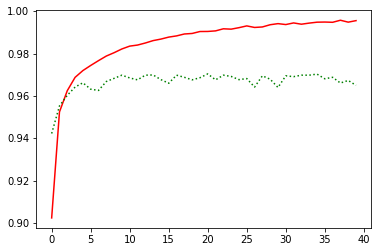

In [24]:
plt.plot(model.history.history['accuracy'], 'r-')
plt.plot(model.history.history['val_accuracy'], 'g:')

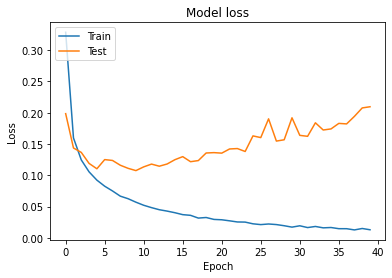

In [26]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
inp = X_test[0].reshape((1, 28, 28))
res = model.predict(inp)

1/1 [==============================] - 0s 89ms/step
